**Importing libraries**

In [ ]:
#inporting general libraries
import sys
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#importing matplot library
import matplotlib.pyplot as plt
%matplotlib inline

**Importing, Pre-processing and splitting the Data**

In [ ]:
#importing mnist dataset from tensorflow keras
from tensorflow.keras.datasets import mnist

#loading and splitting mnist dataset into training and test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
#Exploring the dataset

print('Number of rows and columns :',x_train.shape)
print('Data Type :',x_train.dtype)

Number of rows and columns : (60000, 28, 28)
Data Type : uint8


In [ ]:
#shaping the data 
print('Number of rows and columns :',y_train.shape)
#shaping the data 
print('Data Type :',y_train.dtype)

Number of rows and columns : (60000,)
Data Type : uint8


In [ ]:
#shaping the data 
print('Number of rows and columns :',x_test.shape)
#shaping the data 
print('Data Type :',x_test.dtype)

Number of rows and columns : (10000, 28, 28)
Data Type : uint8


In [ ]:
#shaping the data 
print('Number of rows and columns :',y_test.shape)
#shaping the data 
print('Data Type :',y_test.dtype)

Number of rows and columns : (10000,)
Data Type : uint8


In [ ]:
print(x_train[5])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 252 252 21

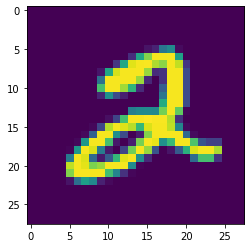

In [ ]:
plt.imshow(x_train[5])

In [ ]:
print(y_train[5])

2


**Building the Model**

In [ ]:
#Optimizing using Exponential Learning Rate
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=False)

In [ ]:
#Building model 
#Stacking the Neural Network layers using Sequential
model1 = tf.keras.Sequential()

#Flattening the data in order to pass through the network
model1.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

#Adding a layer of 128 nodes with Sigmoid Activation Function 
model1.add(tf.keras.layers.Dense(128, activation='sigmoid'))

#Adding a layer of 128 nodes with Rectified Linear Unit Activation Function 
model1.add(tf.keras.layers.Dense(128, activation='relu'))

#Output layer with 10 nodes of Softmax Activation Function
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
#Compiling the Model Using ADAM Optimizer

model1.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
#Using EarlyStopping Function to stop when the model improves

early_Stop = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3, restore_best_weights=True)
#check_point= tf.keras.callbacks.ModelCheckpoint('model1.h5', monitor='accuracy', save_best_only=False)
check_point=tf.keras.callbacks.ModelCheckpoint(
    'model1.h5',
    monitor="accuracy",
    verbose=0,
    save_best_only=False,
    mode="auto",
    save_freq="epoch"
)
#Fitting the model with ADAM Optimizer
model1.fit(x_train, y_train,epochs=30,validation_split=0.1, callbacks =[early_Stop, check_point])

Epoch 1/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1691 - accuracy: 0.9468 - val_loss: 0.1563 - val_accuracy: 0.9522
Epoch 2/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1705 - accuracy: 0.9449 - val_loss: 0.1502 - val_accuracy: 0.9535
Epoch 3/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1707 - accuracy: 0.9465 - val_loss: 0.1655 - val_accuracy: 0.9488
Epoch 4/30
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1686 - accuracy: 0.9464 - val_loss: 0.1559 - val_accuracy: 0.9520


In [ ]:
#Evaluating the model and calculating Loss and Accuracy
loss, acc = model1.evaluate(x_test, y_test)
print('Loss : ',loss)
print('Accuracy : ',acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1853 - accuracy: 0.9433
Loss :  0.1852678656578064
Accuracy :  0.9433000087738037


In [ ]:
#Building model 
#Stacking the Neural Network layers using Sequential
model2 = tf.keras.Sequential()

#Flattening the data in order to pass through the network
model2.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

#Adding a layer of 128 nodes with Sigmoid Activation Function 
model2.add(tf.keras.layers.Dense(128, activation='sigmoid'))

#Adding a layer of 128 nodes with Rectified Linear Unit Activation Function 
model2.add(tf.keras.layers.Dense(128, activation='relu'))

#Output layer with 10 nodes of Softmax Activation Function
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:

#Compiling the Model Using SGD Optimizer
model2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Creating Earlystop and model checkpoint
earlyStop2 = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4, restore_best_weights=True)
#checkpoint= tf.keras.callbacks.ModelCheckpoint('model2.h5', monitor='loss', save_best_only=False)
checkpoint2=tf.keras.callbacks.ModelCheckpoint(
    'model2.h5',
    monitor="accuracy",
    verbose=0,
    save_best_only=False,
    mode="auto",
    save_freq="epoch"
)

In [ ]:
#Fitting the model with SGD Optimizer
model2.fit(x_train, y_train,epochs=30,validation_split=0.1, callbacks =[earlyStop2, checkpoint2])

Epoch 1/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4760 - accuracy: 0.8395 - val_loss: 0.3955 - val_accuracy: 0.8710
Epoch 2/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4764 - accuracy: 0.8423 - val_loss: 0.4723 - val_accuracy: 0.8397
Epoch 3/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4785 - accuracy: 0.8394 - val_loss: 0.4256 - val_accuracy: 0.8622
Epoch 4/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4681 - accuracy: 0.8468 - val_loss: 0.3874 - val_accuracy: 0.8750
Epoch 5/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4919 - accuracy: 0.8377 - val_loss: 0.4663 - val_accuracy: 0.8398
Epoch 6/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5354 - accuracy: 0.8194 - val_loss: 0.4503 - val_accuracy: 0.8433
Epoch 7/30
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4853 - accuracy: 0.8383 - val_loss: 0.4512 - val_accuracy:

In [ ]:
#Evaluating the model and calculating Loss and Accuracy 
loss, acc = model2.evaluate(x_test, y_test)
print('Loss : ',loss)
print('Accuracy : ',acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.4574 - accuracy: 0.8491
Loss :  0.4574217200279236
Accuracy :  0.8490999937057495


In [ ]:
# initial_learning_rate = 0.1
# decay_steps=100000
# decay_rate=0.96
#expdec=tf.keras.optimizers.schedules.ExponentialDecay(
#    initial_learning_rate = 0.1, decay_steps=100000, decay_rate=0.96, staircase=False, name=None
#)

In [ ]:
# model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=expdec),
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])